<a href="https://colab.research.google.com/github/silasedubjg/TCC2/blob/main/TCC2_BloodDonation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando biblioteca Pandas

# Nova seção

**Carregando os dados** ,
**Instalando bibliotecas**


In [12]:
!pip install scikit-learn
!pip install pandas-profiling[notebook]


import pandas as pd
import pandas_profiling as pf

df = pd.read_csv('/content/transfusion (2).data')
df.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 6.5 MB/s 
     |████████████████████████████████| 423 kB 35.5 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you h

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


**Renomeando colunas**

In [3]:
col = df.columns
col



Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [4]:
colunas = {
    'Recency (months)' : 'Recência (meses)', 'Frequency (times)': 'Nº de doações', 
    'Monetary (c.c. blood)': 'Total de sangue doado(ml)',
       'Time (months)' : 'Meses última doação', 
       'whether he/she donated blood in March 2007': 'Doou ou não'
}

df = df.rename(columns = colunas)
col = df.columns
col


Index(['Recência (meses)', 'Nº de doações', 'Total de sangue doado(ml)',
       'Meses última doação', 'Doou ou não'],
      dtype='object')

**Dados estatísticos do DATASET**

In [5]:
df.describe()

,Recência (meses),Nº de doações,Total de sangue doado(ml),Meses última doação,Doou ou não
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df.info()
df.groupby('Doou ou não').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Recência (meses)           748 non-null    int64
 1   Nº de doações              748 non-null    int64
 2   Total de sangue doado(ml)  748 non-null    int64
 3   Meses última doação        748 non-null    int64
 4   Doou ou não                748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recência (meses),Nº de doações,Total de sangue doado(ml),Meses última doação
Doou ou não,,,,
0,570,570,570,570
1,178,178,178,178


**Separação da coluna Target**

In [7]:
x= df[["Recência (meses)","Nº de doações","Total de sangue doado(ml)","Meses última doação"]]
y= df[["Doou ou não"]]

x.head()
y.head()

,Doou ou não
0,1
1,1
2,1
3,1
4,0


**Separação em casos de treino e de teste**

In [8]:
x_train = x[:561]
y_train = y[:561]
x_test = x[561:]
y_test = y[561:]


In [9]:


x = df.drop('Doou ou não', axis=1)
y = df['Doou ou não']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_test.head()

,Recência (meses),Nº de doações,Total de sangue doado(ml),Meses última doação
668,11,1,250,11
317,14,4,1000,26
612,4,1,250,4
57,2,7,1750,28
719,23,8,2000,69


In [33]:
print(df.iloc[668])
print(df.iloc[317])
print(df.iloc[612])
print(df.iloc[57])
print(df.iloc[719])


Recência (meses)              11
Nº de doações                  1
Total de sangue doado(ml)    250
Meses última doação           11
Doou ou não                    0
Name: 668, dtype: int64
Recência (meses)               14
Nº de doações                   4
Total de sangue doado(ml)    1000
Meses última doação            26
Doou ou não                     0
Name: 317, dtype: int64
Recência (meses)               4
Nº de doações                  1
Total de sangue doado(ml)    250
Meses última doação            4
Doou ou não                    1
Name: 612, dtype: int64
Recência (meses)                2
Nº de doações                   7
Total de sangue doado(ml)    1750
Meses última doação            28
Doou ou não                     1
Name: 57, dtype: int64
Recência (meses)               23
Nº de doações                   8
Total de sangue doado(ml)    2000
Meses última doação            69
Doou ou não                     0
Name: 719, dtype: int64


**Implementação dos modelos**

Acurácia: 0.8066666666666666
Precisão: 0.5714285714285714
Recall: 0.13333333333333333
F1: 0.21621621621621623


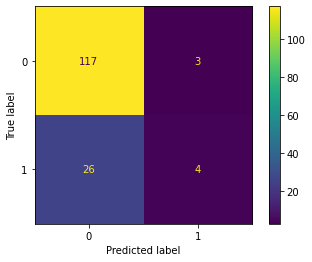

In [28]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics





lr = LogisticRegression(C=1e5,max_iter=1000)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)
from joblib import dump, load
dump(lr , 'LR.joblib')

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))


%matplotlib inline
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

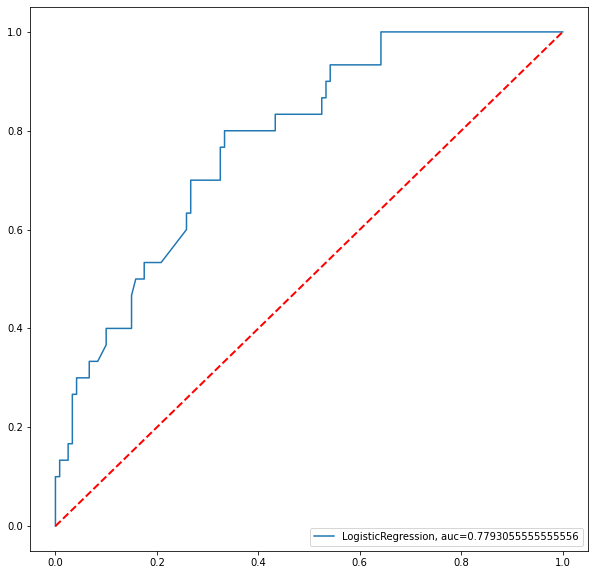

In [12]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 




lr = SGDClassifier(alpha= 0.1, loss= 'hinge', penalty= 'l1')
clf =lr.fit(x_train, y_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model = calibrator.fit(x_train, y_train)

SGDCpred =model.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, SGDCpred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, SGDCpred))
print("Precisão:",metrics.precision_score(y_test, SGDCpred))
print("Recall:",metrics.recall_score(y_test, SGDCpred)) 
print("F1:",metrics.f1_score(y_test, SGDCpred))




In [ ]:
y_pred_proba = model.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="SGDClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [ ]:
from sklearn.linear_model import SGDOneClassSVM
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


ppp = SGDOneClassSVM()

ppp.fit(x_train, y_train)
ppppred =ppp.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, ppppred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, ppppred))
print("Precisão:",metrics.precision_score(y_test, ppppred))
print("Recall:",metrics.recall_score(y_test, ppppred)) 
print("F1:",metrics.f1_score(y_test, ppppred))

In [16]:
y_pred_proba = ppp.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="SGDOneClassSVM, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

AttributeError: ignored

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
Nearest = NearestCentroid()

Nearest.fit(x_train, y_train)
NearestNearest =Nearest.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, NearestNearest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, NearestNearest))
print("Precisão:",metrics.precision_score(y_test, NearestNearest))
print("Recall:",metrics.recall_score(y_test, NearestNearest)) 
print("F1:",metrics.f1_score(y_test, NearestNearest))

In [ ]:
y_pred_proba = Nearest.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="SGDOneClassSVM, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors" : [5, 10, 20, 25],
    "leaf_size" : [5, 15, 30, 40],
   
}

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 

kkk = KNeighborsClassifier(leaf_size= 5, n_neighbors= 10)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)

from joblib import dump, load
dump(kkk , 'KNN.joblib')
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="KNeighborsClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn import svm
kkk = svm.SVC()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

params = {
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
   
}

clf = svm.SVC(kernel='rbf',probability=True)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="KNeighborsClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn import svm
kkk = svm.SVC(kernel='poly',probability=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))


In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:

from sklearn.naive_bayes import GaussianNB

kkk = GaussianNB()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
print(GaussianNB().get_params().keys())


params = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
  
}

clf = GaussianNB()
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from joblib import dump, load
dump(kkk , 'NB.joblib')
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn.naive_bayes import ComplementNB
kkk = ComplementNB(alpha=1,norm=False)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
print(ComplementNB().get_params().keys())

params = {
    'alpha': [0.1,0.8,0.4],
    'norm': [True,False]
}

clf = ComplementNB()
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="ComplementNB, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
kkk = MultinomialNB(alpha=0.1)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
print(MultinomialNB().get_params().keys())

params = {
    'alpha': [0.1,0.8,0.4],
}

clf = MultinomialNB()
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(x_train, y_train)

print(grid.best_params_) 
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="MultinomialNB, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn import tree
kkk = tree.DecisionTreeClassifier(min_samples_split =0.2)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
print(tree.DecisionTreeClassifier().get_params().keys())

params = {
    'min_samples_split' :[0.1,0.2,0.3,0.4,0.5,0.9,1.0]
    }

clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid=params, cv=10)

grid.fit(x_train, y_train)

print(grid.best_params_) 
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)

from joblib import dump, load
dump(kkk , 'DT.joblib')
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
tree.plot_tree(kkk)


In [ ]:
import graphviz
dot_data = tree.export_graphviz(kkk, out_file=None, 
                    
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Acurácia: 0.8066666666666666
Precisão: 0.5263157894736842
Recall: 0.3333333333333333
F1: 0.4081632653061224


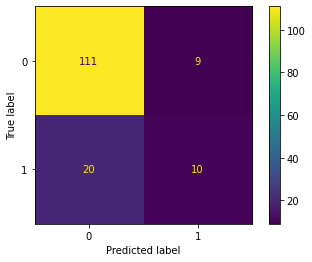

In [18]:
from sklearn.ensemble import RandomForestClassifier
kkk = RandomForestClassifier(max_depth=1000, min_samples_split=0.1, n_estimators=1000)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
# print(RandomForestClassifier().get_params().keys())

# params = {
#     'min_samples_split' :[0.1,0.2,0.3,0.4,0.5,0.9,1.0],
#     'n_estimators' : [1,10,100,1000],
#     'max_depth' :[1,10,100,1000]
#     }

# clf = RandomForestClassifier()
# grid = GridSearchCV(clf, param_grid=params, cv=10)


# grid.fit(x_train, y_train)

# print(grid.best_params_) 

from joblib import dump, load
dump(kkk , 'RF.joblib')
kkkkkk =kkk.predict(x_test)
kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)

%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="RandomForestClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

Acurácia: 0.8266666666666667
Precisão: 0.625
Recall: 0.3333333333333333
F1: 0.43478260869565216


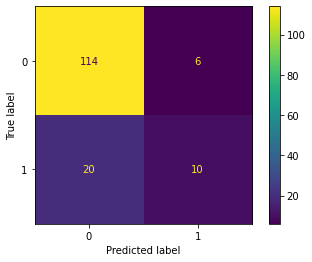

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
kkk = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=16, random_state=0)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)

from joblib import dump, load
dump(kkk , 'ET.joblib')

%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="ExtraTreesClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
kkk = AdaBoostClassifier(n_estimators=77,random_state=2)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="AdaBoostClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
kkk = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, max_depth=1, random_state=0)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="GradientBoostingClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
kkk = HistGradientBoostingClassifier(max_iter=100)


kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="HistGradientBoostingClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
kkk = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=0)

kkk.fit(x_train, y_train)
kkkkkk =kkk.predict(x_test)
%matplotlib inline
cm = confusion_matrix(y_test, kkkkkk)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Acurácia:",metrics.accuracy_score(y_test, kkkkkk))
print("Precisão:",metrics.precision_score(y_test, kkkkkk))
print("Recall:",metrics.recall_score(y_test, kkkkkk)) 
print("F1:",metrics.f1_score(y_test, kkkkkk))

In [ ]:
y_pred_proba = kkk.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (10., 10.)
plt.plot(fpr,tpr,label="GradientBoostingClassifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=8)